# Lab 7 - Time Evolution
Exploring time evolution of quantum states. Run the usual imports, and use the spin-1/2 states as previously defined:

In [3]:
import matplotlib.pyplot as plt
from numpy import sqrt,pi,arange,cos,sin
from qutip import *

In [4]:
%matplotlib inline

In [5]:
pz = Qobj([[1],[0]])
mz = Qobj([[0],[1]])
px = Qobj([[1/sqrt(2)],[1/sqrt(2)]])
mx = Qobj([[1/sqrt(2)],[-1/sqrt(2)]])
py = Qobj([[1/sqrt(2)],[1j/sqrt(2)]])
my = Qobj([[1/sqrt(2)],[-1j/sqrt(2)]])
Sx = 1/2.0*sigmax()
Sy = 1/2.0*sigmay()
Sz = 1/2.0*sigmaz()

Define the Hamiltonian:
$$H= - \mathbf{\mu}\cdot \mathbf{B} =-\gamma S_z B$$
$$\hat{H} = -\Omega \hat{S}_z$$

In [6]:
Omega = 5
H = -Omega*Sz

In [8]:
t = arange(0,4*pi/Omega,0.05)

The next line calls a Schrödinger equation solver (sesolve). It's arguments are the Hamiltonian, the starting state $\lvert+x\rangle$ (px), the time values, and a list of operators. `sesolve` returns many things, but the `expect` method is most useful, it gives the expectation values of the three operators in the operator list.

In [9]:
expect_ops = [Sx,Sy,Sz]
result1 = sesolve(H, px, t, expect_ops)

In [10]:
expect_ops[0] # TODO get name of variable to use in label

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.   0.5]
 [ 0.5  0. ]]

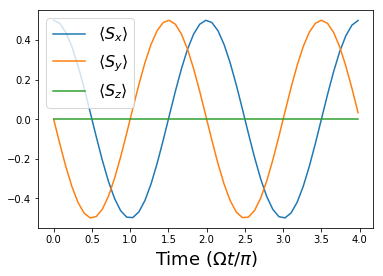

In [12]:
labels = ['x','y','z']
for r,l in zip(result1.expect,labels):
    plt.plot(result1.times*Omega/pi, r, label="$\langle S_%c \\rangle $" % l)

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16) #TODO fix legend text size

Now what if the system starts in $\lvert+z\rangle$?

In [13]:
result2 = sesolve(H, pz, t, [Sx,Sy,Sz])

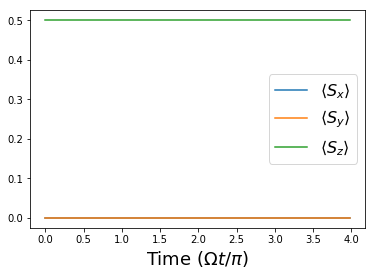

In [14]:
for r,l in zip(result2.expect,labels):
    plt.plot(result2.times*Omega/pi, r, label="$\langle S_%c \\rangle $" % l)

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16) #TODO fix legend text size

Spin-up stays spin-up (i.e. no prescession)

## Two particle systems:
$\lvert\psi\rangle = \frac{1}{\sqrt{2}} \lvert+z,-z\rangle + \frac{1}{\sqrt{2}} \lvert-z,+z\rangle$

Use the `tensor` QuTiP function to form multi-particle states

In [15]:
psi = 1/sqrt(2)*tensor(pz, mz) + 1/sqrt(2)*tensor(mz, pz)

Hamiltonian is the same for both particles so we use the tensor to form $\hat{H}$ from individual operators

In [16]:
omega = 5
H = -omega*tensor(Sz,Sz)

In [17]:
expect_op = tensor(mz,pz)*tensor(mz,pz).dag()
result3 = sesolve(H, psi, t, expect_op)

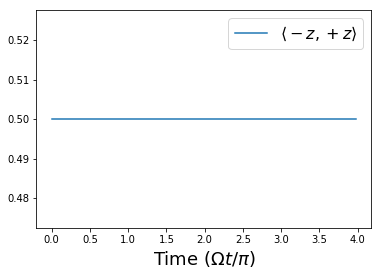

In [18]:
for r,l in zip(result3.expect,labels):
    plt.plot(result3.times*omega/pi, r, label="$\langle -z,+z\\rangle$")

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16) #TODO fix legend text size

The value is constant since the state is initially in an eigenstate of $\hat{H}$.

## What if the magnetic field is not along an axis?

Notice the Hamiltonian has an $x$ and a $z$ component:

In [19]:
omega=2
H = -omega/sqrt(2)*(Sz + Sx)
t = arange(0,2*pi/omega,0.05)

In [20]:
result4 = sesolve(H, px, t, [Sx, Sy, Sz])

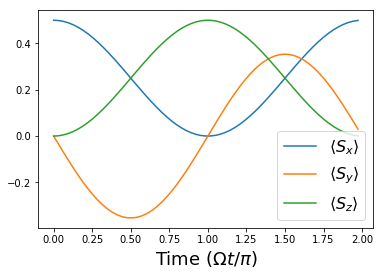

In [21]:
for r,l in zip(result4.expect,labels):
    plt.plot(result4.times*omega/pi, r, label="$\langle S_%c \\rangle $" % l)

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16) #TODO fix legend text size

Harder to interpret, so we'll use the Bloch sphere:

In [22]:
sx, sy, sz = result4.expect

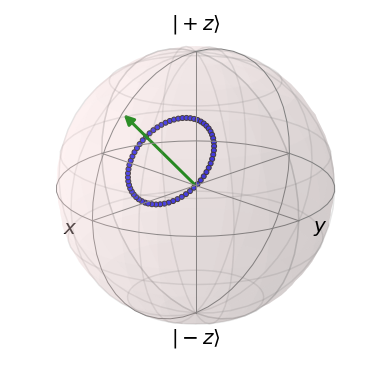

In [23]:
b = Bloch()
b.add_points([sx,sy,sz])
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b.view = [-45,20]
b.add_vectors([1/sqrt(2),0,1/sqrt(2)])
b.show()

## Time-dependent Hamiltonian:
We'll explore the parameters of a spin in a time-varying magnetic field. This system is relevant to nuclear magnetic resonance (NMR) which is used in chemistry and as Magnetic Resonance Imaging (MRI) in medicine.

Following Compliment 9.A the Hamiltonian is:
$$\hat{H}= - \Omega_0 \hat{S}_z - \Omega_1 cos(\omega t)\hat{S}_x$$
We then solve for a certain amount of time after the state starts in $|\psi(0)\rangle = |+z\rangle$

We also use the definition of the Rabi frequency: $\Omega_R = \sqrt{(\omega - \Omega_0)^2 + (\Omega_1/2)^2}$ as in (9.A.28)

Note that the time span is 3 units of $\frac{2\pi}{\Omega_R}$. Leave the scaling in place, but to plot a longer time period, change 3.0 to something larger. This lets us match the units in Fig. 9.A.1.

In [24]:
omega0 = 2.0 * 2 * pi   # pick a nice value for a frequency, note this is 1 Hz
omega1 = 0.25 * 2 * pi  # 25% of omega0
w = 2.0 * 2 * pi        # the driving frequency

H0 = - omega0 * Sz      # the first term in H
H1 = - omega1 * Sx      # the second term in H

omegaR = sqrt((w - omega0)**2 + (omega1/2.0)**2)
t = arange(0,3.0 * 2 * pi / omegaR,0.02)   # scale the time by omegaR, plot 3 units of 2pi/omegaR

args = [H0, H1, w]      # parts of the Hamiltonian 

def H1_coeff(t, args):
    return cos(w * t)

H = [H0, [H1, H1_coeff]]

The next line calls a Schrödinger equation solver (`sesolve`). The arguments are the Hamiltonian, the starting state $\lvert+z\rangle$ (`pz`), the time values, a list of operators, and the arguments to the function `H_t`. `sesolve` returns many things, but the `expect` method is most useful, it gives the expectation values of the four operators in the operator list. Notice the fourth operator is the $\lvert-z\rangle$ projection operator. It's expectation value is $P(\lvert-z\rangle,t)$

In [25]:
result5 = sesolve(H, pz, t, [Sx, Sy, Sz, mz*mz.dag()],args)
sx, sy, sz, Pmz = result5.expect

Look at the Bloch sphere for this system:

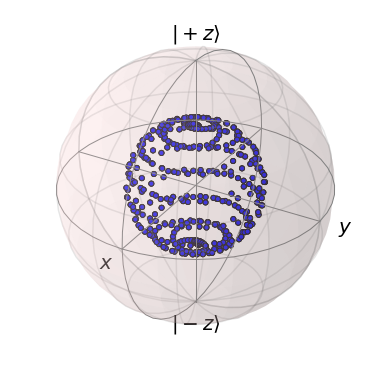

In [26]:
b2 = Bloch()
b2.add_points([sx,sy,sz])
b2.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b2.show()

Make a plot analogous to Fig 9.A.1:

Text(0,0.5,'$P(-z, t)$')

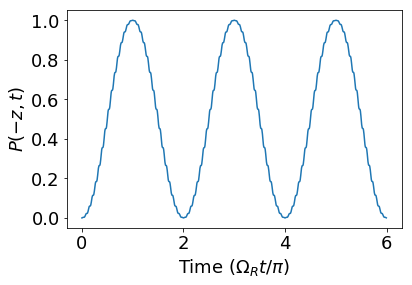

In [27]:
plt.tick_params(labelsize=18)
plt.plot(result5.times*omegaR/pi,Pmz)
plt.xlabel("Time ($\Omega_R t/\pi$)", size=18)
plt.ylabel("$P(-z, t)$", size=18)

### Q) What happens in each unit of time ($\frac{2\pi}{\Omega_R}$)? Look at the plot of $P(-z,t)$ to interpret this. How is your figure different from the on in Fig. 9.A.1?

### Q) How does the evolution change if you double $\Omega_0$?

### Q) After doubling $\Omega_0$ what if you double the driving frequency ($\omega$) also? Interpret this observation in terms of Fig. 9.A.2. In practice, what experimental parameter changes $\Omega_0$?

### Q) How does $\Omega_1$ influence the dynamics? (Be careful reading the plots since the units are scaled by $\Omega_R$).

### Advanced topic: we can change the Hamiltonian so the applied field turns off at a certain time, and it is possible to get the spin to stay in a particular state. This is very useful in quantum optics where certain operations change the atomic state in a very specific way.

In [28]:
omega0 = 1.0 * 2 * pi   # pick a nice value for a frequency, note this is 1 Hz
omega1 = 0.05 * 2 * pi  # 25% of omega0
w = 1.0 * 2 * pi        # the driving frequency

H0 = - omega0 * Sz      # the first term in H
H1 = - omega1 * Sx      # the second term in H

omegaR = sqrt((w - omega0)**2 + (omega1/2.0)**2)
t = arange(0,3.0 * 2 * pi / omegaR,0.05)   # scale the time by omegaR, plot 3 units of 2pi/omegaR

def H1_coeff2(t, args):       # this function calculates H at each time step t
    if t < 2*pi/omegaR * 0.5:  # only add the H1 piece for the first chunk of time.
        coeff = cos(w * t)
    else:
        coeff = 0
    return coeff

H = [H0, [H1, H1_coeff2]]

In [29]:
result6 = sesolve(H, pz, t, [Sx, Sy, Sz, mz*mz.dag()],args)
sx, sy, sz, Pz = result6.expect

Text(0,0.5,'$P(-z, t)$')

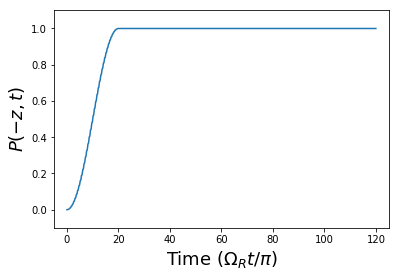

In [30]:
plt.plot(result6.times,Pz)
plt.ylim(-0.1,1.1)
plt.xlim(-5,125)
plt.xlabel("Time ($\Omega_R t/\pi$)", size=18)
plt.ylabel("$P(-z, t)$", size=18)